In [1]:
import numpy as np
from data.dataset import BaseDataset

Device: cpu
Epochs: 200
Random seed set at: 21


In [2]:
dataset = BaseDataset()

Loading the dataset...
Features stats:
Mean: 0.0	Std: 0.25	Median: 0.0


In [3]:
df = dataset.df

In [5]:
import pandas as pd

print("Correlation Matrix")
# print(df.corr())
# print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(kind='quick_sort', ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
corr= get_top_abs_correlations(df, 10)
print(corr)
# print(get_top_abs_correlations(df, 3))

Correlation Matrix
Top Absolute Correlations
IdioRisk   IdioVol3F         0.959826
AM         Leverage          0.959372
HerfAsset  HerfBE            0.957888
ret        STreversal        0.949387
Herf       HerfAsset         0.919195
zerotrade  zerotradeAlt12    0.917872
DolVol     Illiquidity       0.914903
IntanCFP   IntanEP           0.904521
Herf       HerfBE            0.895134
zerotrade  zerotradeAlt1     0.883943
dtype: float64


In [6]:
corr_df = df.iloc[:,3:].corr()

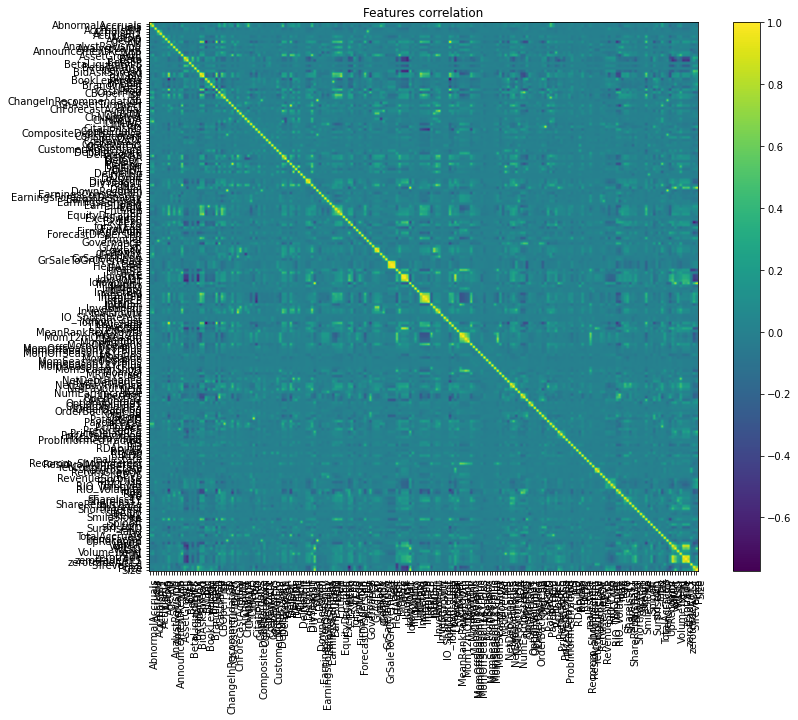

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
ax = plt.subplot(111)
im = ax.imshow(corr_df)

# Show all ticks and label them with the respective list entries
# ax.set_xticks(np.arange(len(corr_df.iloc[:,3:].index)), labels=corr_df.iloc[:,3:].index)
# ax.set_yticks(np.arange(len(corr_df.iloc[:,3:].index)), labels=corr_df.iloc[:,3:].index)

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(corr_df.index)):
#     for j in range(len(corr_df.index)):
#         text = ax.text(j, i, corr_df.iloc[i, j],
#                        ha="center", va="center", color="w")
plt.colorbar(im)
ax.set_title("Features correlation")
plt.tight_layout()
plt.show()
